Our Groups Goal!

Label + Data Integrity/ISRC

-number of streams by label

-country, year, registrant, random code

-use artist, title, songwriter to identify duplicate ISRC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

Might as well just upload those because that what you do in python.
Our team is  data integrity issues (isrc) / label.

In [2]:
%matplotlib inline

In [3]:
music_df = pd.read_csv("../data/NSS-Sample.csv")
music_df = music_df.rename(columns={"If ":"ISRC"})
music_df.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [4]:
music_df=music_df.set_axis(["ISRC","Country","Registrant","Year","Month_Streamed",
                            "Platform","Streams","Artist","Label","Recording_Title","Release_Title",
                            "Duration_Sec","Songwriter_Listed"], axis=1)
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ISRC               98240 non-null   object 
 1   Country            98303 non-null   object 
 2   Registrant         98303 non-null   object 
 3   Year               98239 non-null   float64
 4   Month_Streamed     91898 non-null   object 
 5   Platform           96001 non-null   object 
 6   Streams            100000 non-null  object 
 7   Artist             100000 non-null  object 
 8   Label              98992 non-null   object 
 9   Recording_Title    100000 non-null  object 
 10  Release_Title      99931 non-null   object 
 11  Duration_Sec       100000 non-null  int64  
 12  Songwriter_Listed  100000 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.9+ MB


In [5]:
music_null = music_df[music_df.isna().any(axis=1)]

In [6]:
music_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10285 entries, 0 to 99837
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISRC               8525 non-null   object 
 1   Country            8588 non-null   object 
 2   Registrant         8588 non-null   object 
 3   Year               8524 non-null   float64
 4   Month_Streamed     2183 non-null   object 
 5   Platform           6286 non-null   object 
 6   Streams            10285 non-null  object 
 7   Artist             10285 non-null  object 
 8   Label              9277 non-null   object 
 9   Recording_Title    10285 non-null  object 
 10  Release_Title      10216 non-null  object 
 11  Duration_Sec       10285 non-null  int64  
 12  Songwriter_Listed  10285 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


In [7]:
music_null['Streams'] = music_null['Streams'].astype(str)
music_null['Streams'] = music_null['Streams'].str.replace(',','')
music_null['Streams'] = music_null['Streams'].astype(int)

C:\Users\phili\AppData\Local\Temp/ipykernel_16432/4266343818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_null['Streams'] = music_null['Streams'].astype(str)
C:\Users\phili\AppData\Local\Temp/ipykernel_16432/4266343818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_null['Streams'] = music_null['Streams'].str.replace(',','')
C:\Users\phili\AppData\Local\Temp/ipykernel_16432/4266343818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [8]:
nulls=music_null.groupby(['Platform'], as_index=False).agg({'Artist':'count', 'Streams': 'sum'})
nonulls = music_df.groupby(['Platform'], as_index=False).agg({'Artist':'count', 'Streams': 'sum'})
nonulls['Streams'] = nonulls['Streams']/1000000
print(nulls)
print(nonulls)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
music_df.isnull().sum()

In [ ]:
music_df["ISRC"].fillna(" ", inplace = True)
music_df["Country Code"].fillna(" ", inplace = True)
music_df["Registrant Code"].fillna(" ", inplace = True)
music_df["Year of Reference"].fillna(" ", inplace = True)
music_df["Usage Period"].fillna(" ", inplace = True)
music_df["Streaming Platform (DSP)"].fillna(" ", inplace = True)
music_df["Streams"].fillna(" ", inplace = True)
music_df["Recording Artist"].fillna(" ", inplace = True)
music_df["Recording Label"].fillna(" ", inplace = True)
music_df["Recording Title"].fillna(" ", inplace = True)
music_df["Release Title"].fillna(" ", inplace = True)
music_df["Recording Duration (Seconds)"].fillna(" ", inplace = True)

In [9]:
music_df.rename(columns={music_df.columns[12]: 'ListsWriters'}, inplace=True) #renames songwriter column 
nowriter=music_df.loc[(music_df['ListsWriters']==0)] #finds only records where there's no songwriter
nowriter=nowriter.groupby(['Platform'], as_index=False).agg({'ListsWriters':'count'}) #aggregates by platform

In [10]:
music_df.isnull().sum()

ISRC               1760
Country            1697
Registrant         1697
Year               1761
Month_Streamed     8102
Platform           3999
Streams               0
Artist                0
Label              1008
Recording_Title       0
Release_Title        69
Duration_Sec          0
ListsWriters          0
dtype: int64

Following code is getting rid of commas in the streams column to make it an integer

In [11]:
music_df['Streams'] = music_df['Streams'].astype(str)
music_df['Streams']=music_df['Streams'].str.replace(',','')
music_df['Streams'] = music_df['Streams'].astype(int)

So we're having an extrordinarily difficult time turning the years column into an integer. Why is this an impossible feat? Why does it refuse to turn into a string even though there are no nulls? Why does it refuse to turn into a float when there are no nulls???

In [12]:
indie = music_df[music_df['Artist'] == music_df['Label']]

In [13]:
print(indie)

               ISRC Country Registrant  Year Month_Streamed    Platform  \
1      USRC12100543      US        RC1  21.0            NaN  SoundCloud   
2      USSM12102263      US        SM1  21.0            NaN  SoundCloud   
5      QZJ842000983      QZ        J84  20.0       3/1/2021     Spotify   
20     TCAFA2064435      TC        AFA  20.0       3/1/2021     Spotify   
21     USUG12100638      US        UG1  21.0       1/1/2021     Pandora   
...             ...     ...        ...   ...            ...         ...   
99936  QZES52178131      QZ        ES5  21.0       1/1/2021     Spotify   
99937  QZNN22197736      QZ        NN2  21.0       4/1/2021     Spotify   
99938  QZNN22197736      QZ        NN2  21.0       3/1/2021     Spotify   
99939  SEBGA1902980      SE        BGA  19.0       5/1/2021     Spotify   
99940  FR6V81080374      FR        6V8  10.0       4/1/2021       Apple   

       Streams                    Artist                     Label  \
1         8597               

In [14]:
indie.describe()

,Year,Streams,Duration_Sec,ListsWriters
count,10863.000000,1.105900e+04,11059.000000,11059.000000
mean,19.678542,5.206031e+04,1152.488742,0.529433
std,12.639607,1.720594e+05,16602.616059,0.499156
min,0.000000,1.000000e+00,0.000000,0.000000
25%,17.000000,8.433000e+03,140.000000,0.000000
50%,19.000000,1.826000e+04,185.000000,1.000000
75%,20.000000,4.296600e+04,236.000000,1.000000
max,99.000000,5.978201e+06,356461.000000,1.000000


In [15]:
music_df.describe()

,Year,Streams,Duration_Sec,ListsWriters
count,98239.000000,1.000000e+05,100000.000000,100000.000000
mean,19.671933,5.626550e+04,1016.893690,0.541610
std,12.638870,2.620276e+05,15565.692133,0.498268
min,0.000000,1.000000e+00,0.000000,0.000000
25%,17.000000,6.807000e+03,149.000000,0.000000
50%,19.000000,1.677250e+04,190.000000,1.000000
75%,20.000000,3.990300e+04,236.000000,1.000000
max,99.000000,2.145617e+07,818738.000000,1.000000


In the following code, we're trying to create a chart that shows the streams by platform. Once we do that, we can also start showing the streams by label.

In [16]:
platform_sums = music_df.groupby(['Platform'], as_index=False).agg({'Streams':['sum']})
#platform_sums = platform_sums.nlargest(n=5,columns=['Streams'])
platform_sums.columns = ['Platform','Streams']
platform_sums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Platform  29 non-null     object 
 1   Streams   29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 592.0+ bytes


In [17]:
platform_sums.head()

,Platform,Streams
0,Amazon,1.511998e+08
1,Anghami,3.468200e+04
2,Apple,1.606454e+09
3,AudioMack,1.199156e+07
4,Classical Archives,2.000000e+01


In [18]:
label_sums = music_df.groupby(['Label'], as_index=False).agg({'Streams':['sum']})
label_sums.columns = ['Label','Streams']
label_nulls = music_null.groupby(['Label'], as_index=False).agg({'Streams':['sum']})
label_nulls.columns = ['Label','Streams']
label_sums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    11778 non-null  object
 1   Streams  11778 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 138.1+ KB


In [19]:
print(label_nulls.nlargest(n=50,columns=['Streams']))

                                                  Label   Streams
724                                    Epic/We The Best  31220490
268                                    Atlantic Records  25374010
674   Dreamville, Inc., Under exclusive license to R...  20748305
437                       CMG/N-Less/Interscope Records  10006323
130                                   300 Entertainment   8357327
516                                            Columbia   6140304
2204                                         eOne Music   5624968
1479                                            Platoon   5187998
948                                Imaginary Landscapes   5062116
1589                                   Republic Records   4924867
871                                  H$M Music / EMPIRE   4907585
2099                                     Warner Records   4837819
354                                     Big Boy Records   4257633
867                          Guwop Enterprises/Atlantic   4216251
1380      

In [20]:
print(label_sums.nlargest(n=50,columns=['Streams']))

                                                   Label    Streams
1738                                    Atlantic Records  172396961
2979                                            Columbia  131147208
842                                    300 Entertainment   96692925
1418                              Alamo (Geffen Records)   88320747
9861                                        Taylor Swift   77937703
1420                                       Alamo Records   72800179
6232                                        Lofi Records   69694317
8445                                    Republic Records   64775231
8160                                        RBMG/Def Jam   60845258
10871                                     Warner Records   59667514
3675   Dreamville, Inc., Under exclusive license to R...   52628821
5439                                     Jay Rebel Music   43494541
7455                                                 OVO   43332946
2579                       CMG/N-Less/Interscope

Using the code in this markdown isn't working because we're trying to make a grid with a series.

grid = sns.FacetGrid(music_df, hue = "Platform")
grid.map(sns.barplot, music_df['Label'], music_df.groupby('Platform')['Streams'].sum())
plt.xlim(reversed(plt.xlim()))
grid.add_legend()

C:\Users\phili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Amazon'),
 Text(1, 0, 'Anghami'),
 Text(2, 0, 'Apple'),
 Text(3, 0, 'AudioMack'),
 Text(4, 0, 'Classical Archives'),
 Text(5, 0, 'Deezer'),
 Text(6, 0, 'Fan Label'),
 Text(7, 0, 'GTL'),
 Text(8, 0, 'LiveXLive'),
 Text(9, 0, 'Melodyv'),
 Text(10, 0, 'Midwest Tape'),
 Text(11, 0, 'MixCloud'),
 Text(12, 0, 'MonkingMe'),
 Text(13, 0, 'NugsNet'),
 Text(14, 0, 'Pacemaker'),
 Text(15, 0, 'Pandora'),
 Text(16, 0, 'PowerMusic'),
 Text(17, 0, 'Qoboz'),
 Text(18, 0, 'Recisio'),
 Text(19, 0, 'Smithsonian'),
 Text(20, 0, 'Sonos'),
 Text(21, 0, 'SoundCloud'),
 Text(22, 0, 'Spotify'),
 Text(23, 0, 'Tidal'),
 Text(24, 0, 'Trebel'),
 Text(25, 0, 'Ultimate Guitar'),
 Text(26, 0, 'Wolfgangs'),
 Text(27, 0, 'YouTube'),
 Text(28, 0, 'iHeart Radio')]

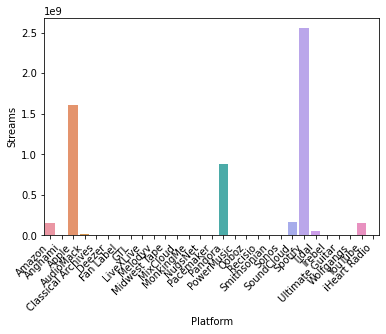

In [21]:
platform_bar = sns.barplot(platform_sums['Platform'],platform_sums['Streams'])
platform_bar.set_xticklabels(platform_bar.get_xticklabels(), rotation=45, horizontalalignment='right')
#wow ok so this gives us a chart i suppose but not QUITE what we're looking for.

label_nullbar = sns.barplot(label_nulls['Label'],label_nulls['Streams'])
label_nullbar.set_xticklabels(label_nullbar.get_xticklabels(), rotation=45, horizontalalignment='right')
#wow ok so this gives us a chart i suppose but not QUITE what we're looking for.

In [22]:
print(platform_sums)

              Platform       Streams
0               Amazon  1.511998e+08
1              Anghami  3.468200e+04
2                Apple  1.606454e+09
3            AudioMack  1.199156e+07
4   Classical Archives  2.000000e+01
5               Deezer  8.783000e+04
6            Fan Label  9.100000e+01
7                  GTL  1.280764e+06
8            LiveXLive  1.013070e+05
9              Melodyv  5.384657e+06
10        Midwest Tape  8.570800e+04
11            MixCloud  2.661000e+03
12           MonkingMe  3.549000e+03
13             NugsNet  1.107090e+05
14           Pacemaker  1.707000e+03
15             Pandora  8.742366e+08
16          PowerMusic  3.154000e+03
17               Qoboz  6.621000e+03
18             Recisio  2.900000e+01
19         Smithsonian  2.080000e+02
20               Sonos  3.140200e+04
21          SoundCloud  1.668138e+08
22             Spotify  2.552564e+09
23               Tidal  4.879313e+07
24              Trebel  1.493470e+05
25     Ultimate Guitar  3.090000e+02
2

dataframe1 = pd.DataFrame(data={"column1": [1, 2, 3, 4, 5]})
dataframe2 = pd.DataFrame(data={"column1": [1, 2]})

common = dataframe1.merge(dataframe2, on=["column1"])
result = dataframe1[~dataframe1.column1.isin(common.column1)]

In [23]:
# Extract the various columns from ISRC
ISRCdecode = music_df['ISRC']
# Extract the ISRC code by artist
ISRCdecodeartist = [entry[7:] for entry in ISRCdecode]
print(ISRCdecodeartist)
#ok this is more or less useless but i can pull the info from ISRC i suppose

TypeError: 'float' object is not subscriptable

In [24]:
artzip = (list(music_df['Artist']),ISRCdecodeartist)

NameError: name 'ISRCdecodeartist' is not defined

This is not doing what i want right now, but we'll get there! Edit: I don't think we will because i misunderstand the role that zip has

In [25]:
print(artzip)

NameError: name 'artzip' is not defined

C:\Users\phili\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Streams', ylabel='Density'>

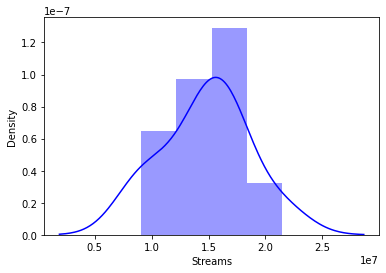

In [26]:
sns.distplot(music_df['Streams'].nlargest(n=10), color='b')

In [27]:
artist_sums = music_df.groupby(['Artist'], as_index=False).agg({'Streams':['sum']})
#artist_top = artist_sums.nlargest(n=10,columns=['Streams'])

In [28]:
music_df.describe(include='all')

,ISRC,Country,Registrant,Year,Month_Streamed,Platform,Streams,Artist,Label,Recording_Title,Release_Title,Duration_Sec,ListsWriters
count,98240,98303,98303,98239.000000,91898,96001,1.000000e+05,100000,98992,100000,99931,100000.000000,100000.000000
unique,54621,77,2368,NaN,5,29,NaN,21149,11778,51059,36723,NaN,NaN
top,TCAEX2053645,US,UM7,NaN,3/1/2021,Spotify,NaN,Various artists,Atlantic Records,Savage,#unknown#,NaN,NaN
freq,119,41621,6020,NaN,39887,32268,NaN,967,1384,134,231,NaN,NaN
mean,NaN,NaN,NaN,19.671933,NaN,NaN,5.626550e+04,NaN,NaN,NaN,NaN,1016.893690,0.541610
std,NaN,NaN,NaN,12.638870,NaN,NaN,2.620276e+05,NaN,NaN,NaN,NaN,15565.692133,0.498268
min,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,17.000000,NaN,NaN,6.807000e+03,NaN,NaN,NaN,NaN,149.000000,0.000000
50%,NaN,NaN,NaN,19.000000,NaN,NaN,1.677250e+04,NaN,NaN,NaN,NaN,190.000000,1.000000
75%,NaN,NaN,NaN,20.000000,NaN,NaN,3.990300e+04,NaN,NaN,NaN,NaN,236.000000,1.000000


In [29]:
platformstreams=music_df.groupby(['Platform'], as_index=False).agg({'Streams':'sum'})
print(platformstreams.head())
topdsps=platformstreams[platformstreams['Platform'].isin(['Apple','Pandora','Spotify','Amazon'])]
topdsps.sort_values(by='Streams', ascending=False)

             Platform       Streams
0              Amazon  1.511998e+08
1             Anghami  3.468200e+04
2               Apple  1.606454e+09
3           AudioMack  1.199156e+07
4  Classical Archives  2.000000e+01


,Platform,Streams
22,Spotify,2.552564e+09
2,Apple,1.606454e+09
15,Pandora,8.742366e+08
0,Amazon,1.511998e+08


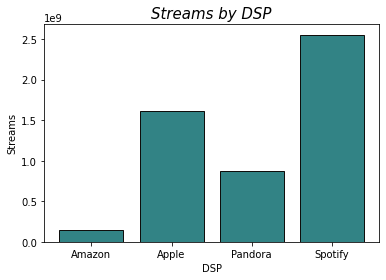

In [30]:
plt.bar(topdsps.Platform, topdsps.Streams, color="#328385", edgecolor="#0f0e0c")
plt.xlabel('DSP')
plt.ylabel('Streams')
plt.title(label='Streams by DSP', fontsize=15, fontstyle='oblique')
plt.show()

In [31]:
indiestreams=indie.groupby(['Platform'], as_index=False).agg({'Streams':'sum'})
print(indiestreams.head())
indiedsps=indiestreams[indiestreams['Platform'].isin(['Apple','Pandora','Spotify','Amazon'])]
indiedsps.sort_values(by='Streams', ascending=False)

  Platform    Streams
0   Amazon   11166093
1  Anghami       2734
2    Apple  113421953
3   Deezer       2090
4      GTL       9058


,Platform,Streams
11,Spotify,320998032
2,Apple,113421953
9,Pandora,53450362
0,Amazon,11166093


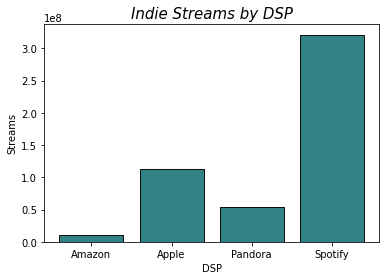

In [32]:
plt.bar(indiedsps.Platform, indiedsps.Streams, color="#328385", edgecolor="#0f0e0c")
plt.xlabel('DSP')
plt.ylabel('Streams')
plt.title(label='Indie Streams by DSP', fontsize=15, fontstyle='oblique')
plt.show()

([<matplotlib.patches.Wedge at 0x17d9f015c10>,
 [Text(0.5416346702059031, 0.9574089429449376, ''),
  Text(-1.049826742008469, 0.32842626533802577, ''),
  Text(-0.6874096807730752, -0.8587595302408347, ''),
  Text(0.27032968515043165, -1.0662653803469702, ''),
  Text(0.8000208666671766, -0.7549613320542315, ''),
  Text(0.937116629358612, -0.5760316163020517, ''),
  Text(1.01670945337098, -0.41988318307129546, ''),
  Text(1.0551513863100854, -0.31089476027734064, ''),
  Text(1.0725823835079027, -0.24406357898815362, ''),
  Text(1.0841668092525019, -0.1859632482918312, ''),
  Text(1.0920893597864652, -0.13168458619439422, ''),
  Text(1.096580835049946, -0.08666298056934985, ''),
  Text(1.0985961737258645, -0.0555558014512479, ''),
  Text(1.0993776186340722, -0.036997995168341, ''),
  Text(1.0996912774923193, -0.02605943605128033, ''),
  Text(1.0998419622576503, -0.018645590825752786, ''),
  Text(1.0999215319961022, -0.013138624408499241, ''),
  Text(1.0999576962122255, -0.0096471002634824

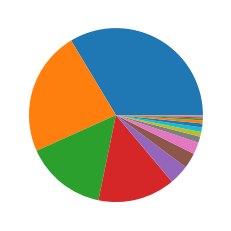

In [33]:
plt.pie(music_df['Platform'].value_counts())

In [50]:
print(music_df['Platform'].value_counts())
print(music_df['Platform'].count())

Spotify               32268
Apple                 22200
Amazon                14438
Pandora               13777
Tidal                  3521
YouTube                2752
SoundCloud             2122
GTL                    1090
Melodyv                 829
Trebel                  817
iHeart Radio            707
AudioMack               550
NugsNet                 316
LiveXLive               200
Qoboz                   104
Midwest Tape            102
Deezer                   51
Anghami                  46
Sonos                    23
Recisio                  22
Smithsonian              21
Ultimate Guitar          19
PowerMusic                8
Wolfgangs                 4
Fan Label                 4
MixCloud                  4
Pacemaker                 3
Classical Archives        2
MonkingMe                 1
Name: Platform, dtype: int64
96001


In [62]:
music_pie = music_df
newplatform = []
for platform in music_pie["Platform"]:
    if platform == 'Spotify':
        newplatform.append("Spotify")
    elif platform == 'Pandora':
        newplatform.append("Pandora")
    elif platform == 'Apple':
        newplatform.append("Apple")
    elif platform == 'Amazon':
        newplatform.append("Amazon")
    else:
        newplatform.append("Other")

In [63]:
print(newplatform)

['Other', 'Other', 'Other', 'Other', 'Other', 'Spotify', 'Apple', 'Amazon', 'Spotify', 'Spotify', 'Apple', 'Spotify', 'Spotify', 'Spotify', 'Spotify', 'Spotify', 'Apple', 'Spotify', 'Apple', 'Spotify', 'Spotify', 'Pandora', 'Apple', 'Apple', 'Spotify', 'Pandora', 'Other', 'Apple', 'Apple', 'Spotify', 'Spotify', 'Spotify', 'Amazon', 'Pandora', 'Pandora', 'Pandora', 'Pandora', 'Amazon', 'Other', 'Spotify', 'Amazon', 'Other', 'Other', 'Spotify', 'Spotify', 'Apple', 'Amazon', 'Spotify', 'Apple', 'Spotify', 'Spotify', 'Spotify', 'Spotify', 'Spotify', 'Spotify', 'Spotify', 'Pandora', 'Apple', 'Apple', 'Spotify', 'Apple', 'Apple', 'Apple', 'Amazon', 'Amazon', 'Other', 'Amazon', 'Other', 'Other', 'Spotify', 'Apple', 'Apple', 'Amazon', 'Spotify', 'Spotify', 'Amazon', 'Amazon', 'Spotify', 'Spotify', 'Spotify', 'Spotify', 'Spotify', 'Spotify', 'Other', 'Pandora', 'Spotify', 'Spotify', 'Pandora', 'Pandora', 'Pandora', 'Pandora', 'Spotify', 'Amazon', 'Amazon', 'Pandora', 'Pandora', 'Pandora', 'Pand

In [73]:
music_pie['Platform'] = newplatform
names = 'Spotify', 'Apple', 'Pandora', 'Amazon', 'Other'

Text(0.5, 1.0, 'Count of Songs Listed by Streaming Platform')

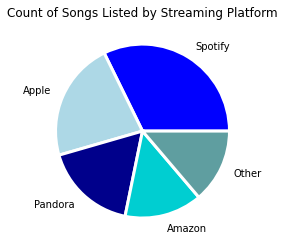

In [89]:
plt.pie(music_pie['Platform'].value_counts(), labels=names, labeldistance=1.15,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, 
        colors=['blue','lightblue','darkblue','darkturquoise','cadetblue'])
plt.title('Count of Songs Listed by Streaming Platform')

In [ ]:
label_pie = music_df
newlabel = []
for platform in label_pie["Platform"]:
    if platform == 'Spotify':
        newplatform.append("Spotify")
    elif platform == 'Pandora':
        newplatform.append("Pandora")
    elif platform == 'Apple':
        newplatform.append("Apple")
    elif platform == 'Amazon':
        newplatform.append("Amazon")
    else:
        newplatform.append("Other")